In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


In [9]:
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

In [11]:
data = pd.read_csv('../input/weather-dataset-rattle-package/weatherAUS.csv')
df = data.copy()
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       NaN     16.9     21.8        No           No  
1       NaN     17.2     24.3        No           No  
2       2.0     21.0     23.2        No           No  
3       NaN     18.1     26.5        No           No  
4       8.0     17.8     29.7        No           No

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [13]:
df.describe().T

count         mean        std    min     25%     50%  \
MinTemp        143975.0    12.194034   6.398495   -8.5     7.6    12.0   
MaxTemp        144199.0    23.221348   7.119049   -4.8    17.9    22.6   
Rainfall       142199.0     2.360918   8.478060    0.0     0.0     0.0   
Evaporation     82670.0     5.468232   4.193704    0.0     2.6     4.8   
Sunshine        75625.0     7.611178   3.785483    0.0     4.8     8.4   
WindGustSpeed  135197.0    40.035230  13.607062    6.0    31.0    39.0   
WindSpeed9am   143693.0    14.043426   8.915375    0.0     7.0    13.0   
WindSpeed3pm   142398.0    18.662657   8.809800    0.0    13.0    19.0   
Humidity9am    142806.0    68.880831  19.029164    0.0    57.0    70.0   
Humidity3pm    140953.0    51.539116  20.795902    0.0    37.0    52.0   
Pressure9am    130395.0  1017.649940   7.106530  980.5  1012.9  1017.6   
Pressure3pm    130432.0  1015.255889   7.037414  977.1  1010.4  1015.2   
Cloud9am        89572.0     4.447461   2.887159    0.0     1.0     5.0   
Cloud3pm        86102.0     4.509930   2.720357    0.0     2.0     5.0   
Temp9am        143693.0    16.990631   6.488753   -7.2    12.3    16.7   
Temp3pm        141851.0    21.683390   6.936650   -5.4    16.6    21.1   

                  75%     max  
MinTemp          16.9    33.9  
MaxTemp          28.2    48.1  
Rainfall          0.8   371.0  
Evaporation       7.4   145.0  
Sunshine         10.6    14.5  
WindGustSpeed    48.0   135.0  
WindSpeed9am     19.0   130.0  
WindSpeed3pm     24.0    87.0  
Humidity9am      83.0   100.0  
Humidity3pm      66.0   100.0  
Pressure9am    1022.4  1041.0  
Pressure3pm    1020.0  1039.6  
Cloud9am          7.0     9.0  
Cloud3pm          7.0     9.0  
Temp9am          21.6    40.2  
Temp3pm          26.4    46.7

In [14]:
miss = df.isnull().sum().sort_values(ascending=False).head()
miss_per = (miss/len(df))*100
pd.DataFrame({'No. missing values': miss, '% of missing data': miss_per.values})

No. missing values  % of missing data
Sunshine                  69835          48.009762
Evaporation               62790          43.166506
Cloud3pm                  59358          40.807095
Cloud9am                  55888          38.421559
Pressure9am               15065          10.356799

<AxesSubplot:>

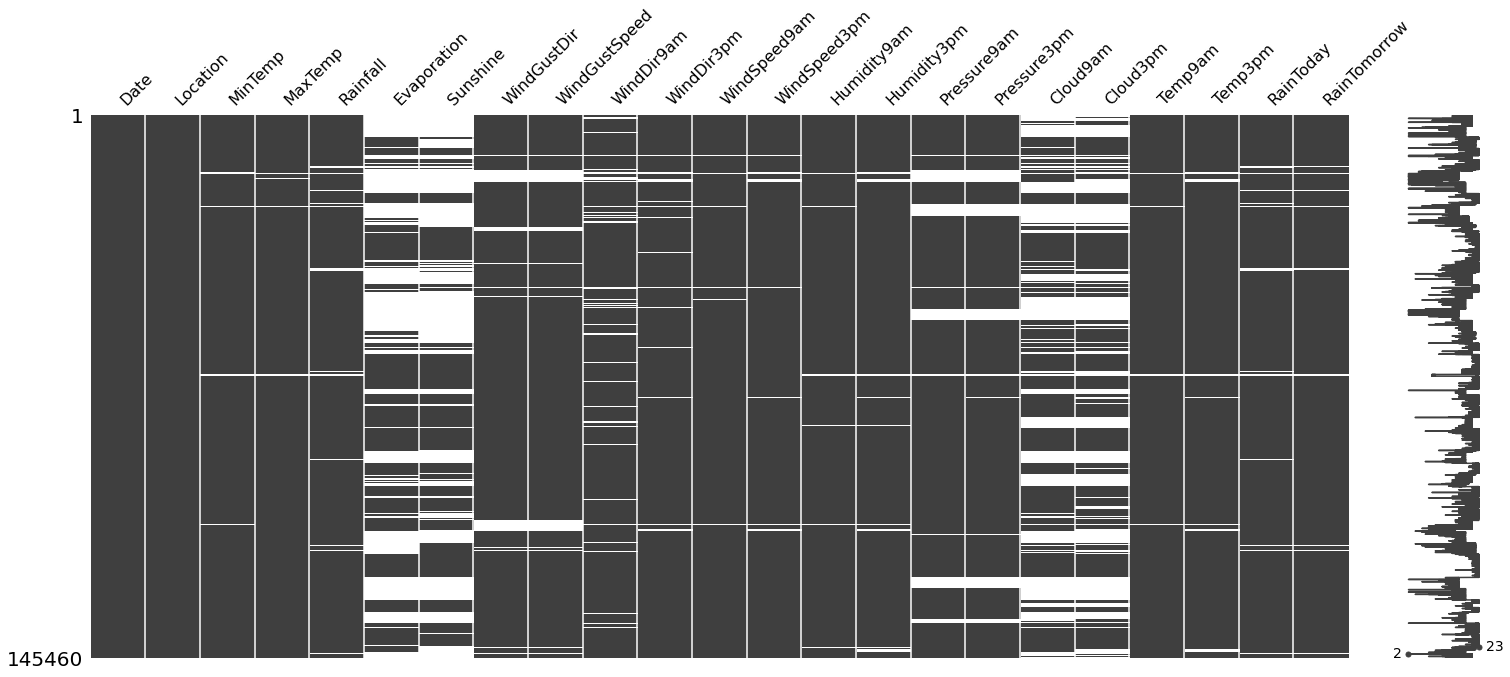

In [15]:

msno.matrix(df)

<AxesSubplot:>

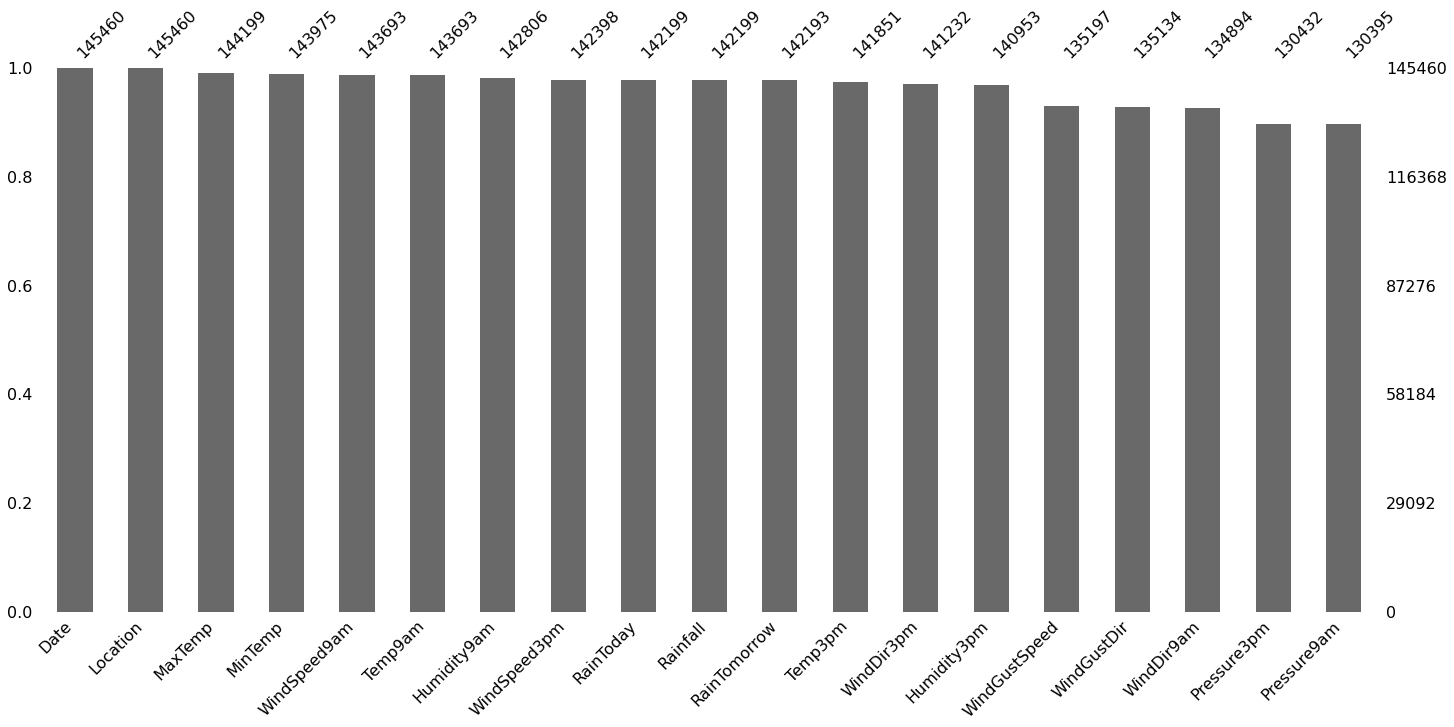

In [18]:
msno.bar(df, sort='descending')

In [19]:

categorical = [i for i in df.columns if df[i].dtype=='object']
categorical

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [20]:
numerical = [i for i in df.columns if df[i].dtype=='float64']
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [21]:
df[categorical].isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [22]:
df['Date'] =pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df.sample(5)

Date     Location  MinTemp  MaxTemp  Rainfall WindGustDir  \
1019  2011-10-16       Albury      9.1     18.7       0.0           W   
73725 2014-01-18         Nhil     21.0     31.4       0.0           S   
53258 2012-04-10  MountGinini     -4.5      5.8       1.0           S   
39032 2016-02-06   WaggaWagga     13.7     29.1       0.0           E   
15274 2009-06-17    Newcastle     10.3     17.0      71.4         NaN   

       WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
1019            50.0        WSW          W          24.0          33.0   
73725           50.0          S        SSW          20.0          28.0   
53258           56.0         SE        SSE          13.0          11.0   
39032           41.0          E        NaN          20.0           0.0   
15274            NaN        NaN         SW           0.0           4.0   

       Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  \
1019          58.0         34.0       1017.9       1020.5     12.7     17.3   
73725         59.0         38.0       1012.1       1011.5     22.9     30.0   
53258         93.0         60.0          NaN          NaN     -1.1      3.5   
39032         59.0         34.0       1017.4       1014.2     20.4     27.4   
15274         94.0         85.0          NaN          NaN     12.5     15.8   

      RainToday RainTomorrow  Day  Month  Year  
1019         No           No   16     10  2011  
73725        No           No   18      1  2014  
53258        No           No   10      4  2012  
39032        No           No    6      2  2016  
15274       Yes          Yes   17      6  2009

In [25]:

df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [26]:

df.Location.nunique()

49

In [27]:
df.Location.value_counts()

Canberra            3436
Sydney              3344
Adelaide            3193
Perth               3193
Melbourne           3193
Brisbane            3193
Hobart              3193
Darwin              3193
Launceston          3040
Ballarat            3040
Cairns              3040
MountGambier        3040
Townsville          3040
Bendigo             3040
Wollongong          3040
Albury              3040
Albany              3040
GoldCoast           3040
AliceSprings        3040
MountGinini         3040
Penrith             3039
Newcastle           3039
Tuggeranong         3039
BadgerysCreek       3009
WaggaWagga          3009
Watsonia            3009
Cobar               3009
CoffsHarbour        3009
MelbourneAirport    3009
Nuriootpa           3009
Mildura             3009
Moree               3009
Portland            3009
Sale                3009
Dartmoor            3009
Witchcliffe         3009
SydneyAirport       3009
Woomera             3009
Richmond            3009
Williamtown         3009


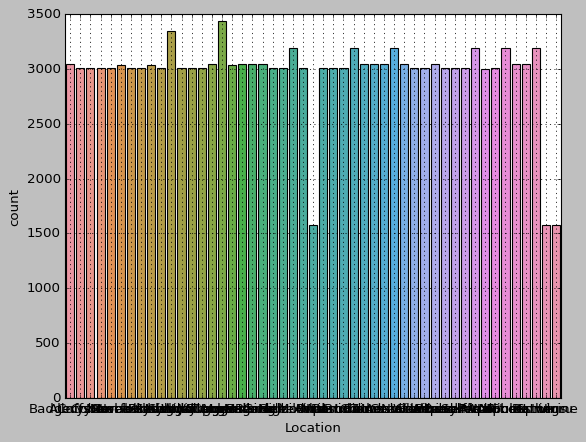

In [28]:
plt.style.use("classic")
sns.countplot(data=df, x="Location")
plt.grid(linewidth = 0.7)
plt.show()

In [30]:
df.WindGustDir.unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [31]:

df.WindGustDir.value_counts()

W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: WindGustDir, dtype: int64

In [32]:

df.WindGustDir.nunique()

16

In [34]:
df['WindGustDir'].fillna(df['WindGustDir'].mode()[0], inplace=True)

In [35]:
df.WindGustDir.isnull().sum()

0

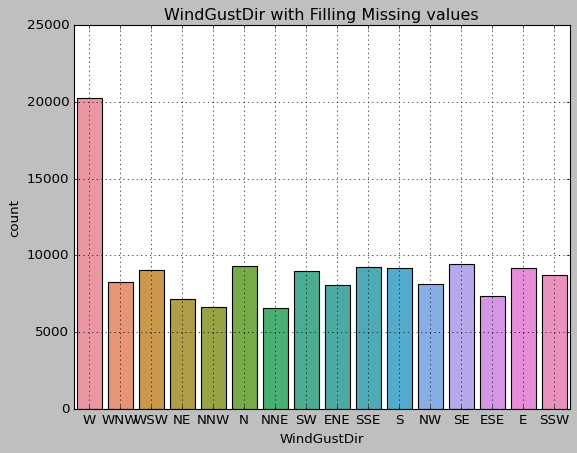

In [36]:
plt.style.use("classic")
sns.countplot(data=df, x="WindGustDir")
plt.grid(linewidth = 0.7)
plt.title('WindGustDir with Filling Missing values')
plt.show()

In [39]:
fig_3 = px.histogram(df, x="WindGustDir", title="WindGustDir with Filling Missing values")
fig_3.show()

In [41]:
df.WindDir9am.value_counts()

N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: WindDir9am, dtype: int64

In [43]:

df['WindDir9am'].fillna(df['WindDir9am'].mode()[0], inplace=True)

In [44]:

df.WindDir9am.isnull().sum()

0

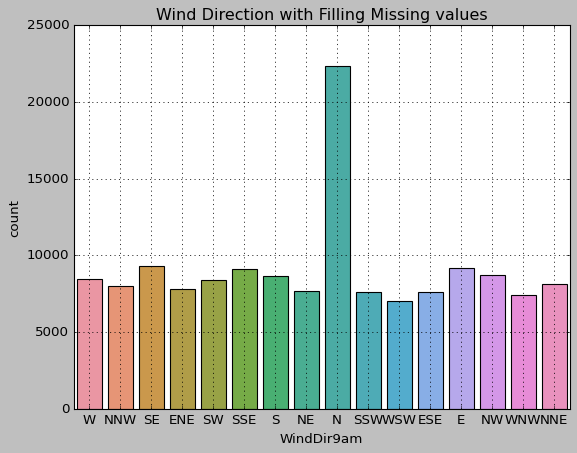

In [45]:
plt.style.use("classic")
sns.countplot(data=df, x="WindDir9am")
plt.grid(linewidth = 0.7)
plt.title('Wind Direction with Filling Missing values')
plt.show()

In [46]:
fig_4 = px.histogram(df, x="WindDir9am", title='Wind Direction at 9am with Filling Missing values')
fig_4.show()

In [47]:
fig_5 = px.histogram(df, x="WindDir3pm")
fig_5.show()

In [48]:
fig_6 = px.histogram(df, x="RainToday")
fig_6.show()

In [49]:
fig_7 = px.histogram(df, x="RainTomorrow")
fig_7.show()

In [50]:

df[numerical].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Temp9am           1767
Temp3pm           3609
dtype: int64

In [51]:
for i in df:
    if df[i].dtype=='float64':
        df[i].replace(to_replace=np.nan, value=df[i].median(), inplace=True)
    else:
        continue

In [52]:
df[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
dtype: int64

In [54]:

df[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
dtype: int64

<AxesSubplot:>

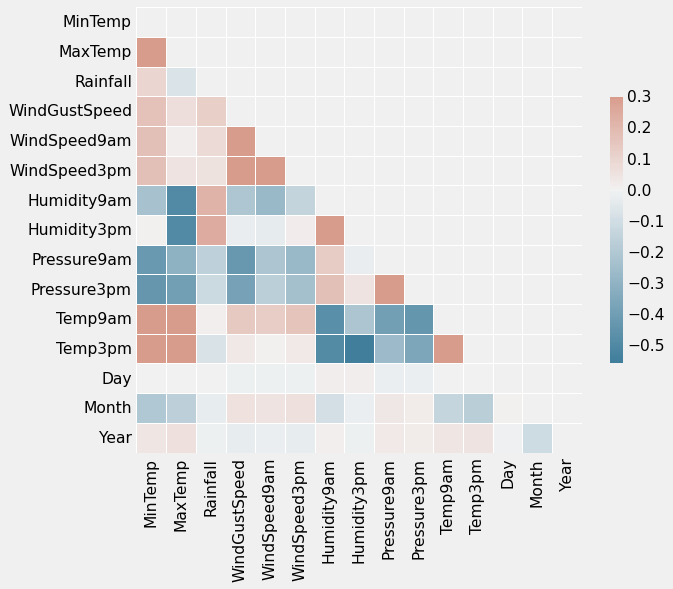

In [56]:
plt.style.use('fivethirtyeight')
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

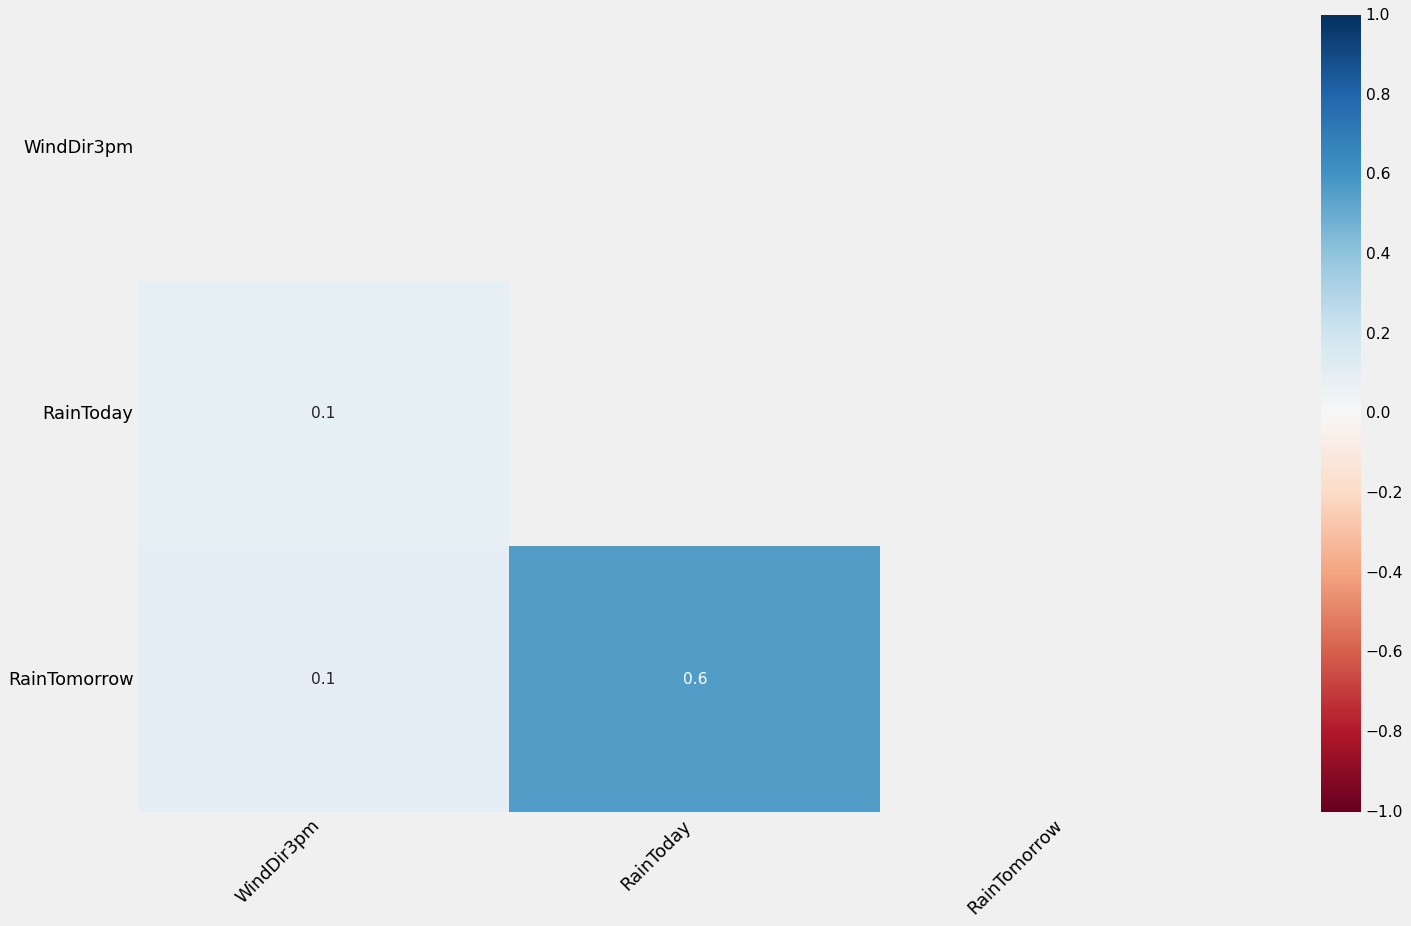

In [57]:

msno.heatmap(df)

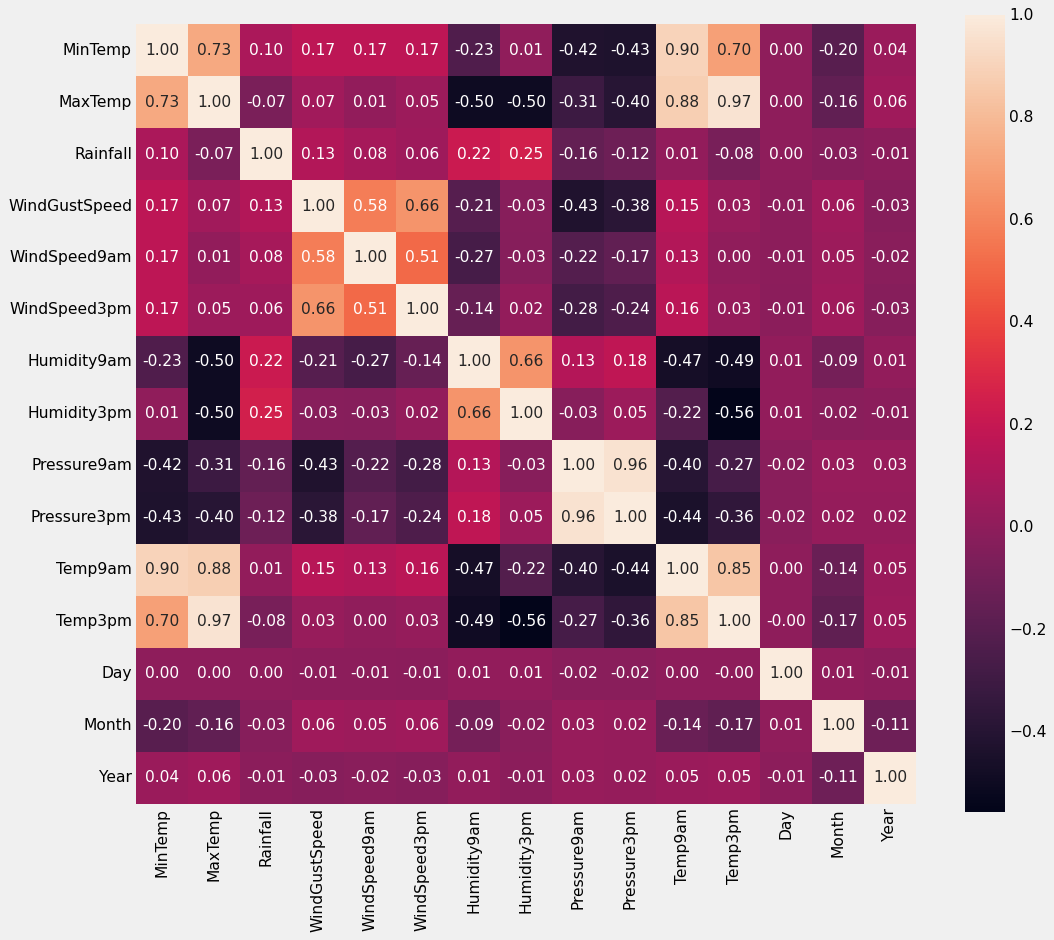

In [58]:
plt.figure(figsize=(14,12))
ax = sns.heatmap(corr, square=True, annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)          
plt.show()